---
# *****LUNG CANCER DETECTION USING ENSEMBLE DEEP LEARNING*****
---

---
# ***IMPORTING DATA & LIBRARIES***
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dataset_directory = '/content/drive/MyDrive/Officialdataset'

for dirname, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.utils import shuffle
import tensorflow as tf
from keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['Normal','Malignant','Benign']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Officialdataset (AUGMENTED)/Traning',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Officialdataset (AUGMENTED)/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(7732, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.3,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)



---


# ***MODEL 1***


---



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

class CNN:

    def __init__(self):
        self.model = Sequential()
        self.modeltrained = False
        self.modelbuilt = False

    def build_and_compile_model(self):
        if self.modelbuilt:
            return

        # First Convolutional Block
        self.model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
        self.model.add(BatchNormalization())
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))

        # Second Convolutional Block
        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(BatchNormalization())
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))

        # Third Convolutional Block
        self.model.add(Conv2D(128, (3, 3), activation='relu'))
        self.model.add(BatchNormalization())
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))

        # Flatten and Dense Layers
        self.model.add(Flatten())
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dropout(0.5))  # Higher dropout to prevent overfitting
        self.model.add(Dense(3, activation='softmax'))  # 3 classes

        # Compile the model
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.modelbuilt = True

    def train_model(self, X_train, y_train, epochs=20):
        if not self.modelbuilt:
            raise Exception("Build and compile the model first!")
        if self.modeltrained:
            return

        # Callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

        # Train the model
        history = self.model.fit(X_train, y_train,
                                  epochs=epochs,
                                  validation_split=0.3,
                                  callbacks=[early_stopping, reduce_lr],
                                  verbose=1)  # Add verbose to see training progress
        self.modeltrained = True
        return history

    def evaluate_model(self, X_test, y_test, labels):
        if not self.modeltrained:
            raise Exception("Train the model first!")

        # Evaluate the model
        y_pred = self.model.predict(X_test)
        y_pred_classes = tf.argmax(y_pred, axis=1)
        y_true_classes = tf.argmax(y_test, axis=1)

        # Classification Report
        print(classification_report(y_true_classes, y_pred_classes, target_names=labels))

    def save_model(self, filepath="cnn.hdf5"):
        if not self.modelbuilt:
            raise Exception("Build and compile the model first!")
        if not self.modeltrained:
            raise Exception("Train the model first!")
        self.model.save(filepath, overwrite=True)
# X_train = []
# Y_train = []
# image_size = 150
# labels = ['Normal', 'Malignant', 'Benign']

# # Load training images
# for label in labels:
#     folderPath = os.path.join('/content/drive/MyDrive/Officialdataset (AUGMENTED)/Traning', label)
#     for j in os.listdir(folderPath):
#         img = cv2.imread(os.path.join(folderPath, j))
#         img = cv2.resize(img, (image_size, image_size))
#         X_train.append(img)
#         Y_train.append(label)

# # Load testing images
# for label in labels:
#     folderPath = os.path.join('/content/drive/MyDrive/Officialdataset (AUGMENTED)/Testing', label)
#     for j in os.listdir(folderPath):
#         img = cv2.imread(os.path.join(folderPath, j))
#         img = cv2.resize(img, (image_size, image_size))
#         X_train.append(img)
#         Y_train.append(label)

# # Convert to numpy arrays
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)

# # Shuffle the dataset
# X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# # Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=101)

# # Convert labels to categorical
# y_train = tf.keras.utils.to_categorical([labels.index(label) for label in y_train])
# y_test = tf.keras.utils.to_categorical([labels.index(label) for label in y_test])



In [ ]:
cnn = CNN()
cnn.build_and_compile_model()  # Build the model
history = cnn.train_model(X_train, y_train, epochs=40)  # Train the model
cnn.evaluate_model(X_test, y_test, labels)  # Evaluate the model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 131ms/step - accuracy: 0.5836 - loss: 6.0785 - val_accuracy: 0.5813 - val_loss: 2.4826 - learning_rate: 0.0010
Epoch 2/40
119/119 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7005 - loss: 0.7710 - val_accuracy: 0.6090 - val_loss: 2.0356 - learning_rate: 0.0010
Epoch 3/40
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7910 - loss: 0.5365 - val_accuracy: 0.7931 - val_loss: 0.4973 - learning_rate: 0.0010
Epoch 4/40
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8152 - loss: 0.4590 - val_accuracy: 0.5985 - val_loss: 3.8445 - learning_rate: 0.0010
Epoch 5/40
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8393 - loss: 0.4476 - val_accuracy: 0.8177 - val_loss: 0.5519 - learning_rate: 0.0010
Epoch 6/40
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8581 - loss: 0.3671 - val_accuracy: 0.9101 - val_loss: 0.2399 - learning_rate: 5.0000e-04
Epoch 7/40
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9000 - l

In [ ]:

# # Define the model
# model = Sequential()

# # First Convolutional Block
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # Second Convolutional Block
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # Third Convolutional Block
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # Flatten and Dense Layers
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))  # Higher dropout to prevent overfitting
# model.add(Dense(3, activation='softmax'))  # 3 classes

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# # Train the model
# history = model.fit(X_train, y_train,
#                     epochs=10,
#                     validation_split=0.3,
#                     callbacks=[early_stopping, reduce_lr])

# # Evaluate the model
# y_pred = model.predict(X_test)
# y_pred_classes = tf.argmax(y_pred, axis=1)
# y_true_classes = tf.argmax(y_test, axis=1)

# # Classification Report
# print(classification_report(y_true_classes, y_pred_classes, target_names=labels))

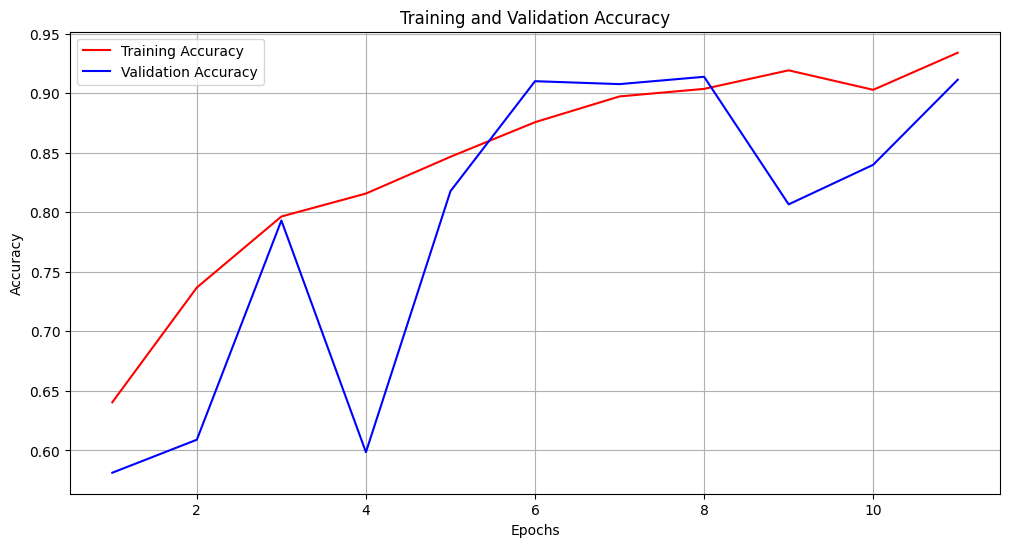

In [ ]:
# Extract accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

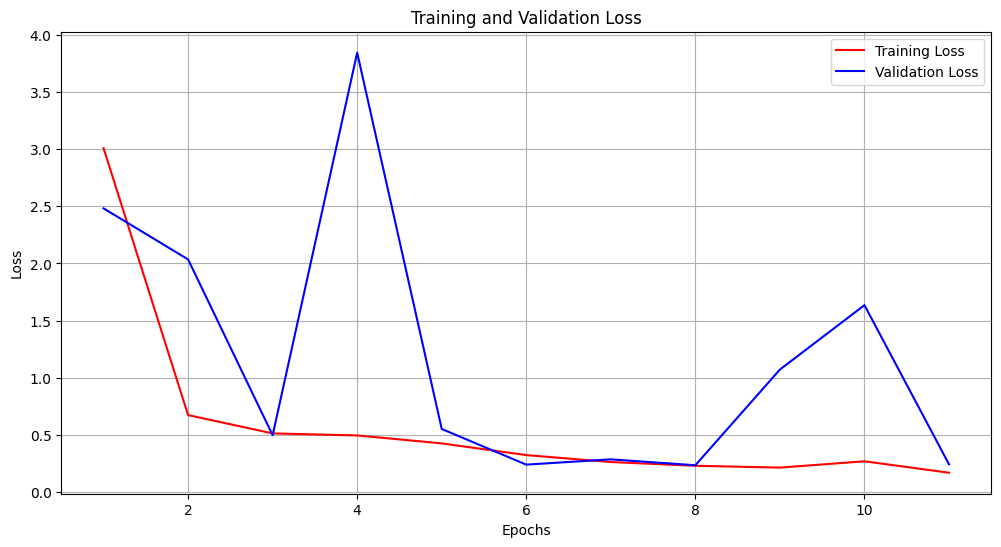

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,739 (40.58 MB)

 Trainable params: 10,636,739 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.5863 - loss: 221.5027 - val_accuracy: 0.9058 - val_loss: 0.3157
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8761 - loss: 0.3756 - val_accuracy: 0.8836 - val_loss: 0.3122
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9017 - loss: 0.2977 - val_accuracy: 0.9575 - val_loss: 0.1464
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9627 - loss: 0.1194 - val_accuracy: 0.9581 - val_loss: 0.1478
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9716 - loss: 0.0976 - val_accuracy: 0.9606 - val_loss: 0.1491
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9624 - loss: 0.1262 - val_accuracy: 0.9643 - val_loss: 0.1365
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9783 - loss: 0.0688 - val_accuracy: 0.9600 - val_loss: 0.1455
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9838 - loss: 0.0442 - val_ac

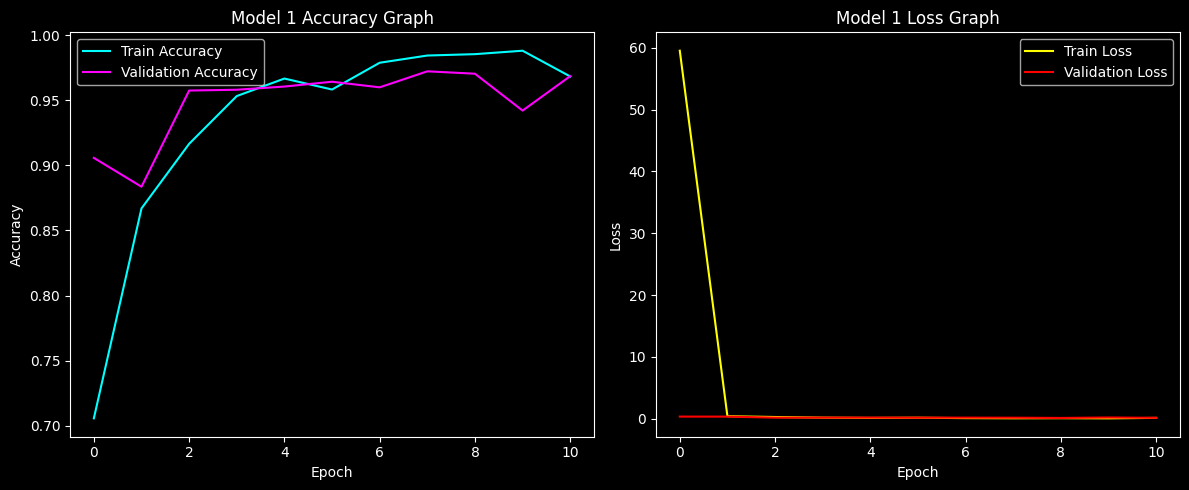

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define your model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=30, validation_split=0.3, callbacks=[early_stopping])

# Plotting the accuracy and loss with black background
plt.style.use('dark_background')  # Set the background to black

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='cyan', label='Train Accuracy')  # Change color to cyan
plt.plot(history.history['val_accuracy'], color='magenta', label='Validation Accuracy')  # Change color to magenta
plt.title('Model 1 Accuracy Graph')  # Title for accuracy graph
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='yellow', label='Train Loss')  # Change color to yellow
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')  # Change color to red
plt.title('Model 1 Loss Graph')  # Title for loss graph
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Show the plots
plt.tight_layout()
plt.show()

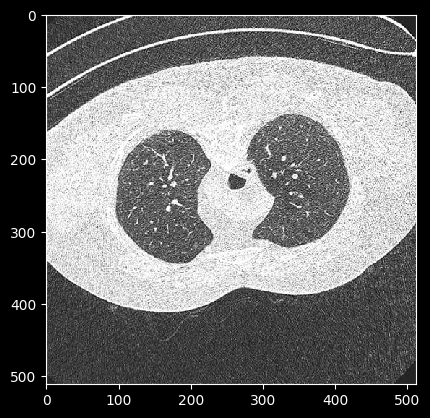

In [ ]:
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img_array = np.array(img)
    img_array = img_array.reshape(1, target_size[0], target_size[1], 3)
    return img_array

# Specify the path to the image
image_path = '/content/drive/MyDrive/Officialdataset (AUGMENTED)/Testing/Benign/Benign_original_Bengin case (104).jpg_c06894e7-6305-477b-b5c4-8c3868c9fdf2.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(image_path)

# Display the image
img = image.load_img(image_path)
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
predicted_class = a.argmax()

# Define a dictionary to map class numbers to tumor information
tumor_info = {
    0: {
        'name': 'Normal',
        'details': 'Normal lung tissue without cancerous growth.',
        'precautions': 'No specific precautions needed.',
        'treatment': 'No cancer treatment required.'
    },
    1: {
        'name': 'Malignant',
        'details': 'Cancerous growth in the lung with potential for metastasis.',
        'precautions': 'Seek immediate medical attention. Avoid smoking and exposure to carcinogens.',
        'treatment': 'Treatment options include surgery, chemotherapy, and radiation therapy.'
    },
    2: {
        'name': 'Benign',
        'details': 'Non-cancerous growth or tumor in the lung.',
        'precautions': 'Monitor for any changes in health. Consult a healthcare professional.',
        'treatment': 'Treatment may be required only if the tumor causes symptoms.'
    }
}

# Display tumor information based on the predicted class
print("Predicted Tumor Type:", tumor_info[predicted_class]['name'])
print("Details:", tumor_info[predicted_class]['details'])
print("Precautions:", tumor_info[predicted_class]['precautions'])
print("Treatment:", tumor_info[predicted_class]['treatment'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted Tumor Type: Benign
Details: Non-cancerous growth or tumor in the lung.
Precautions: Monitor for any changes in health. Consult a healthcare professional.
Treatment: Treatment may be required only if the tumor causes symptoms.


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


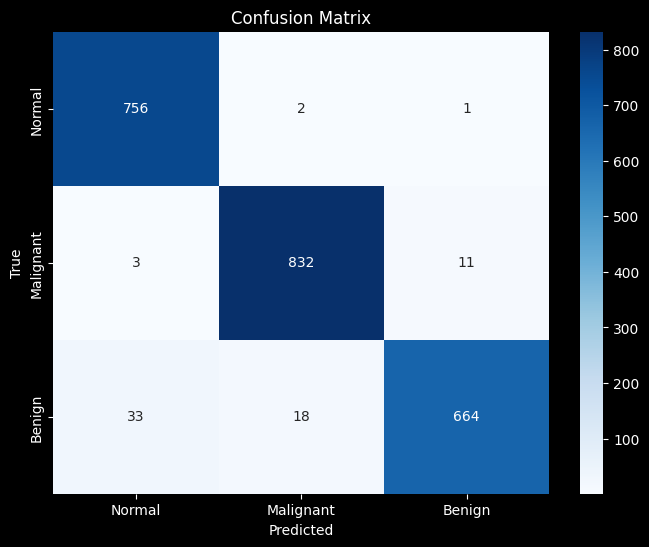

              precision    recall  f1-score   support

      Normal       0.95      1.00      0.97       759
   Malignant       0.98      0.98      0.98       846
      Benign       0.98      0.93      0.95       715

    accuracy                           0.97      2320
   macro avg       0.97      0.97      0.97      2320
weighted avg       0.97      0.97      0.97      2320



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=labels)
print(class_report)


170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


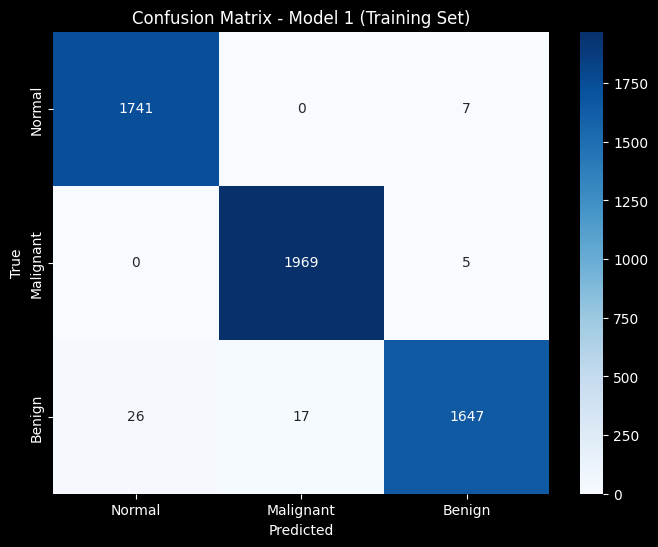

Classification Report - Model 1 (Training Set):
               precision    recall  f1-score   support

      Normal       0.99      1.00      0.99      1748
   Malignant       0.99      1.00      0.99      1974
      Benign       0.99      0.97      0.98      1690

    accuracy                           0.99      5412
   macro avg       0.99      0.99      0.99      5412
weighted avg       0.99      0.99      0.99      5412



In [ ]:
# Generate confusion matrix for Model 1 training set
y_train_pred_model1 = model.predict(X_train)
y_train_pred_classes_model1 = np.argmax(y_train_pred_model1, axis=1)
confusion_mtx_model1 = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred_classes_model1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_model1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Model 1 (Training Set)')
plt.show()

# Print the classification report
class_report_model1 = classification_report(np.argmax(y_train, axis=1), y_train_pred_classes_model1, target_names=labels)
print("Classification Report - Model 1 (Training Set):\n", class_report_model1)




---


# ***MODEL 2***

---



In [ ]:
from tensorflow.keras.optimizers import Adam
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(3, activation='softmax'))

model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,739 (40.58 MB)

 Trainable params: 10,636,739 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=30, validation_split=0.3)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9845 - loss: 0.0501 - val_accuracy: 0.9618 - val_loss: 0.1563
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9831 - loss: 0.0577 - val_accuracy: 0.9643 - val_loss: 0.1408
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9913 - loss: 0.0392 - val_accuracy: 0.9686 - val_loss: 0.1197
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9819 - loss: 0.0615 - val_accuracy: 0.9538 - val_loss: 0.2317
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9898 - loss: 0.0524 - val_accuracy: 0.9723 - val_loss: 0.1091
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9942 - loss: 0.0206 - val_accuracy: 0.9692 - val_loss: 0.1104
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9899 - loss: 0.0373 - val_accuracy: 0.8627 - val_loss: 0.3412
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9130 - loss: 0.2465 - val_accu

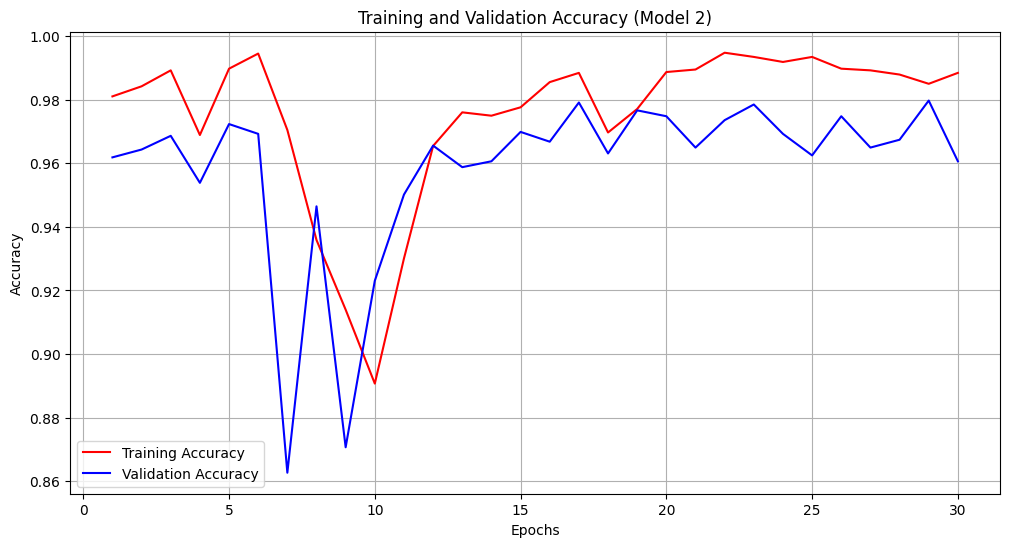

In [ ]:
# Accessing accuracy values for model2
train_accuracy2 = history2.history['accuracy']
val_accuracy2 = history2.history['val_accuracy']

# Creating a range of epochs
epochs = range(1, len(train_accuracy2) + 1)

# Plotting training and validation accuracy for model2
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracy2, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy2, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

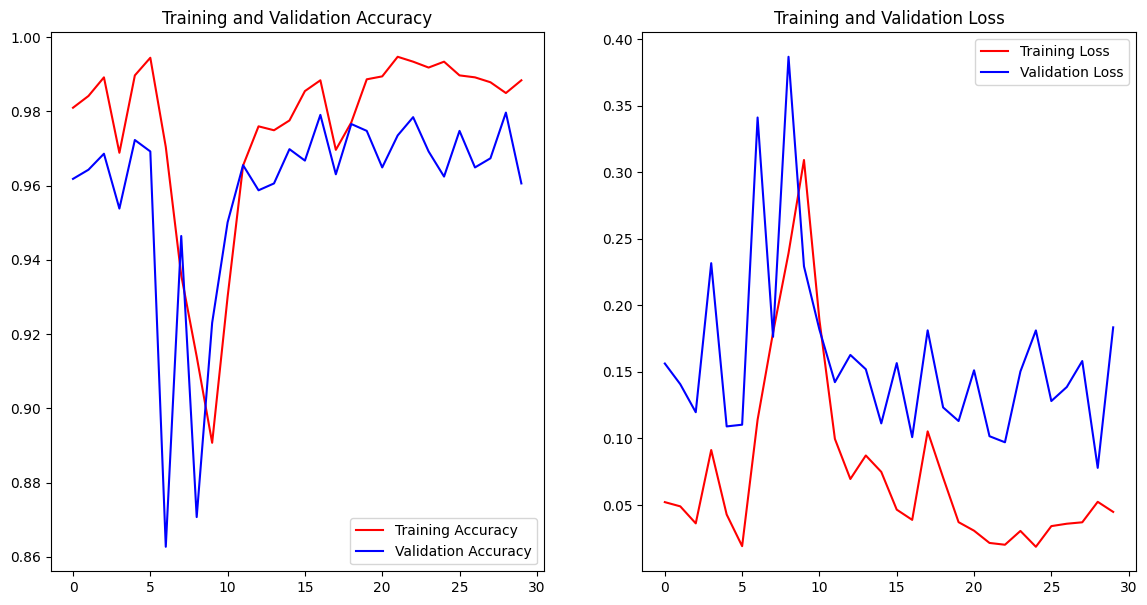

In [ ]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs = range(len(acc2))

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc2, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc2, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend(loc='best')

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss2, 'r', label="Training Loss")
plt.plot(epochs, val_loss2, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend(loc='best')
plt.show()

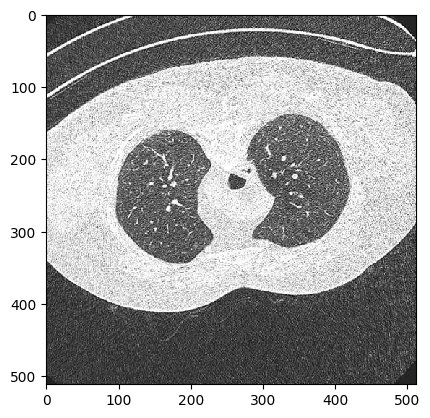

In [ ]:
# Specify the path to the image
image_path = '/content/drive/MyDrive/Officialdataset (AUGMENTED)/Testing/Benign/Benign_original_Bengin case (104).jpg_c06894e7-6305-477b-b5c4-8c3868c9fdf2.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(image_path)

# Display the image
img = image.load_img(image_path)
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
a = model2.predict(img_array)
predicted_class2 = a.argmax()

# Define a dictionary to map class numbers to tumor information
tumor_info = {
    0: {
        'name': 'Normal',
        'details': 'Normal lung tissue without cancerous growth.',
        'precautions': 'No specific precautions needed.',
        'treatment': 'No cancer treatment required.'
    },
    1: {
        'name': 'Malignant',
        'details': 'Cancerous growth in the lung with potential for metastasis.',
        'precautions': 'Seek immediate medical attention. Avoid smoking and exposure to carcinogens.',
        'treatment': 'Treatment options include surgery, chemotherapy, and radiation therapy.'
    },
    2: {
        'name': 'Benign',
        'details': 'Non-cancerous growth or tumor in the lung.',
        'precautions': 'Monitor for any changes in health. Consult a healthcare professional.',
        'treatment': 'Treatment may be required only if the tumor causes symptoms.'
    }
}

# Display tumor information based on the predicted class
print("Predicted Tumor Type:", tumor_info[predicted_class2]['name'])
print("Details:", tumor_info[predicted_class2]['details'])
print("Precautions:", tumor_info[predicted_class2]['precautions'])
print("Treatment:", tumor_info[predicted_class2]['treatment'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
Predicted Tumor Type: Benign
Details: Non-cancerous growth or tumor in the lung.
Precautions: Monitor for any changes in health. Consult a healthcare professional.
Treatment: Treatment may be required only if the tumor causes symptoms.


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


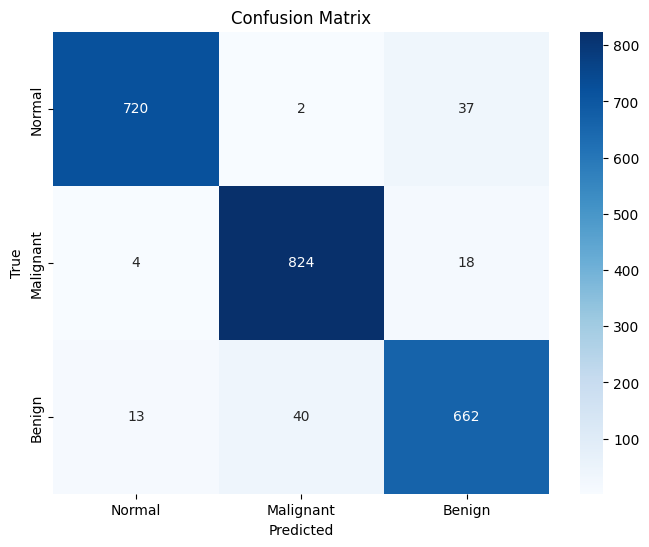

              precision    recall  f1-score   support

      Normal       0.98      0.95      0.96       759
   Malignant       0.95      0.97      0.96       846
      Benign       0.92      0.93      0.92       715

    accuracy                           0.95      2320
   macro avg       0.95      0.95      0.95      2320
weighted avg       0.95      0.95      0.95      2320



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model2.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=labels)
print(class_report)


170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


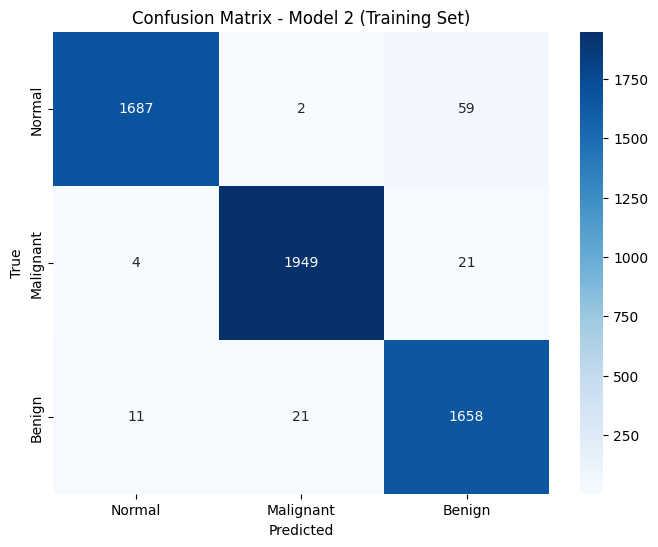

Classification Report - Model 2 (Training Set):
               precision    recall  f1-score   support

      Normal       0.99      0.97      0.98      1748
   Malignant       0.99      0.99      0.99      1974
      Benign       0.95      0.98      0.97      1690

    accuracy                           0.98      5412
   macro avg       0.98      0.98      0.98      5412
weighted avg       0.98      0.98      0.98      5412



In [ ]:
# Generate confusion matrix for Model 2 training set
y_train_pred_model2 = model2.predict(X_train)
y_train_pred_classes_model2 = np.argmax(y_train_pred_model2, axis=1)
confusion_mtx_model2 = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred_classes_model2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_model2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Model 2 (Training Set)')
plt.show()

# Print the classification report
class_report_model2 = classification_report(np.argmax(y_train, axis=1), y_train_pred_classes_model2, target_names=labels)
print("Classification Report - Model 2 (Training Set):\n", class_report_model2)




---


# ***MODEL 3***


---



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5585 - loss: 40.2702 - val_accuracy: 0.8116 - val_loss: 0.5239
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7933 - loss: 0.5352 - val_accuracy: 0.8257 - val_loss: 0.4419
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8202 - loss: 0.4406 - val_accuracy: 0.8959 - val_loss: 0.2907
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8765 - loss: 0.3418 - val_accuracy: 0.9095 - val_loss: 0.3150
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9163 - loss: 0.2240 - val_accuracy: 0.9452 - val_loss: 0.1973
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9349 - loss: 0.1698 - val_accuracy: 0.9483 - val_loss: 0.1771
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9537 - loss: 0.1408 - val_accuracy: 0.9464 - val_loss: 0.1752
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9659 - loss: 0.1023 - val_ac

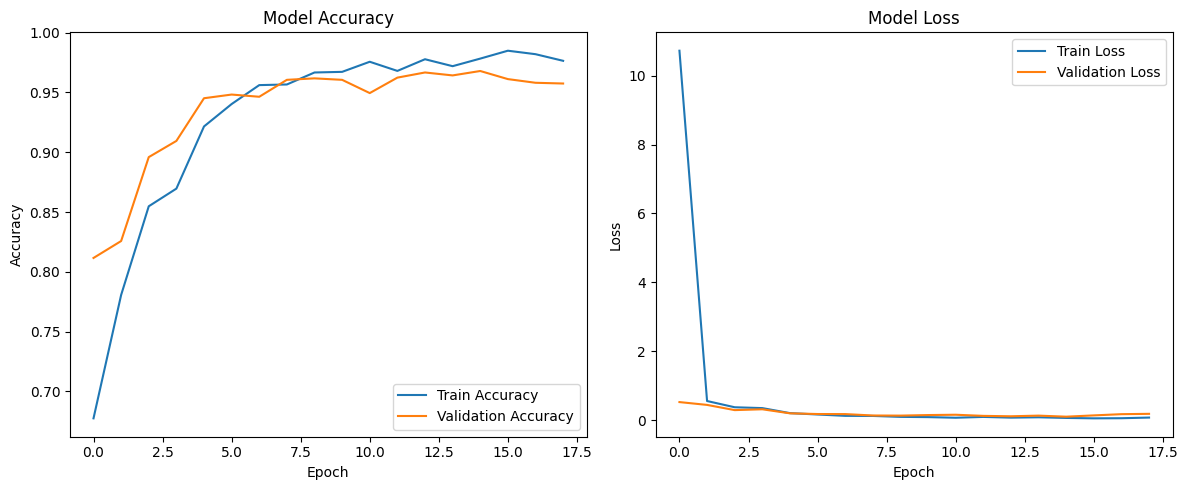

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define your model
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(3, activation='softmax'))

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model with early stopping
history3 = model3.fit(X_train, y_train, epochs=30, validation_split=0.3, callbacks=[early_stopping])

# Plotting the accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(3, activation='softmax'))


model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()

In [ ]:
history3 = model3.fit(X_train,y_train,epochs=30,validation_split=0.3)

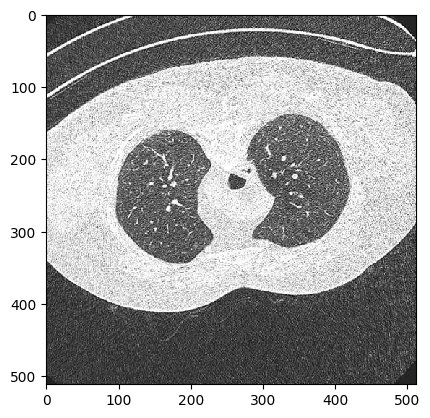

In [ ]:
# Specify the path to the image
image_path = '/content/drive/MyDrive/Officialdataset (AUGMENTED)/Testing/Benign/Benign_original_Bengin case (104).jpg_c06894e7-6305-477b-b5c4-8c3868c9fdf2.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(image_path)

# Display the image
img = image.load_img(image_path)
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
a = model3.predict(img_array)
predicted_class3 = a.argmax()

# Define a dictionary to map class numbers to tumor information
tumor_info = {
    0: {
        'name': 'Normal',
        'details': 'Normal lung tissue without cancerous growth.',
        'precautions': 'No specific precautions needed.',
        'treatment': 'No cancer treatment required.'
    },
    1: {
        'name': 'Malignant',
        'details': 'Cancerous growth in the lung with potential for metastasis.',
        'precautions': 'Seek immediate medical attention. Avoid smoking and exposure to carcinogens.',
        'treatment': 'Treatment options include surgery, chemotherapy, and radiation therapy.'
    },
    2: {
        'name': 'Benign',
        'details': 'Non-cancerous growth or tumor in the lung.',
        'precautions': 'Monitor for any changes in health. Consult a healthcare professional.',
        'treatment': 'Treatment may be required only if the tumor causes symptoms.'
    }
}

# Display tumor information based on the predicted class
print("Predicted Tumor Type:", tumor_info[predicted_class3]['name'])
print("Details:", tumor_info[predicted_class3]['details'])
print("Precautions:", tumor_info[predicted_class3]['precautions'])
print("Treatment:", tumor_info[predicted_class3]['treatment'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Predicted Tumor Type: Benign
Details: Non-cancerous growth or tumor in the lung.
Precautions: Monitor for any changes in health. Consult a healthcare professional.
Treatment: Treatment may be required only if the tumor causes symptoms.


170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


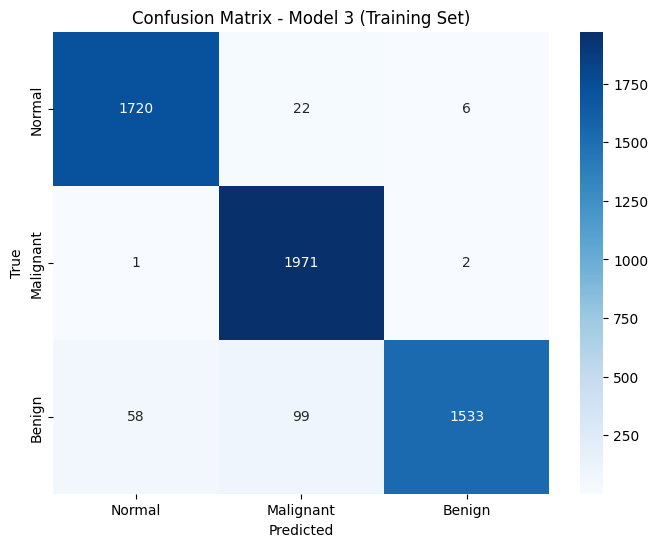

Classification Report - Model 3 (Training Set):
               precision    recall  f1-score   support

      Normal       0.97      0.98      0.98      1748
   Malignant       0.94      1.00      0.97      1974
      Benign       0.99      0.91      0.95      1690

    accuracy                           0.97      5412
   macro avg       0.97      0.96      0.96      5412
weighted avg       0.97      0.97      0.96      5412



In [ ]:
# Generate confusion matrix for Model 3 training set
y_train_pred_model3 = model3.predict(X_train)
y_train_pred_classes_model3 = np.argmax(y_train_pred_model3, axis=1)
confusion_mtx_model3 = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred_classes_model3)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_model3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Model 3 (Training Set)')
plt.show()

# Print the classification report
class_report_model3 = classification_report(np.argmax(y_train, axis=1), y_train_pred_classes_model3, target_names=labels)
print("Classification Report - Model 3 (Training Set):\n", class_report_model3)




---


# ***Ensembling & Voting***


---



73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Ensemble - Accuracy: 0.9737068965517242


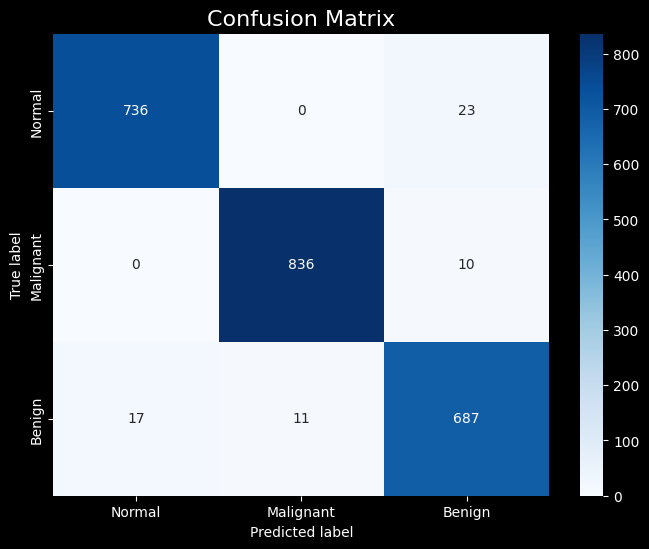

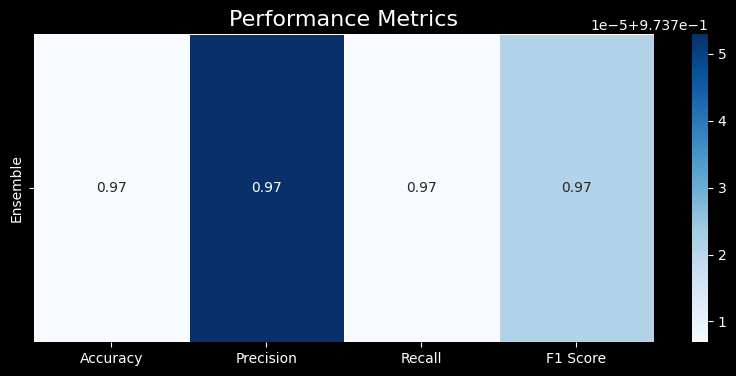

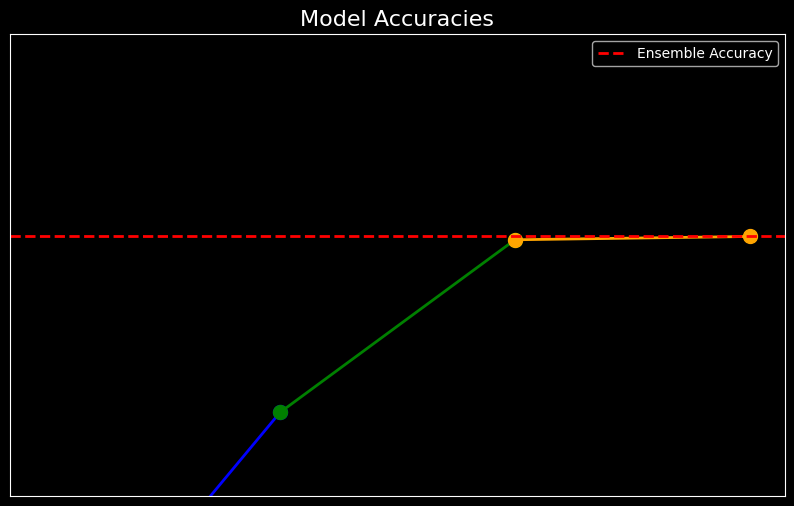

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img_array = np.array(img)
    img_array = img_array.reshape(1, target_size[0], target_size[1], 3)
    return img_array

# Ensemble prediction function
def ensemble_predictions(models, inputs):
    outputs = [model.predict(inputs) for model in models]  # Predict for the entire input set
    avg_output = np.mean(outputs, axis=0)
    predicted_classes = np.argmax(avg_output, axis=1)
    return predicted_classes


models = [cnn.model, model2, model3]  # Ensure all models are included


# Assuming y_test is one-hot encoded, convert it to class labels
true_labels = np.argmax(y_test, axis=1)

# Ensemble predictions
all_preds_ensemble = ensemble_predictions(models, X_test)

# Calculate metrics for individual models and ensemble model
def calculate_metrics(labels, preds):
    report = classification_report(labels, preds, target_names=['Normal', 'Malignant', 'Benign'], output_dict=True)
    return report

# Store accuracies
accuracies = []

# Metrics for individual models
for model in models:
    preds = model.predict(X_test)
    predicted_classes = np.argmax(preds, axis=1)
    metrics_report = calculate_metrics(true_labels, predicted_classes)
    accuracies.append(metrics_report["accuracy"])

# Calculate metrics for ensemble model
ensemble_metrics_report = calculate_metrics(true_labels, all_preds_ensemble)
ensemble_accuracy = ensemble_metrics_report["accuracy"]
accuracies.append(ensemble_accuracy)

# Print metrics for ensemble
print(f'Ensemble - Accuracy: {ensemble_accuracy}')

# Confusion matrix
confusion_mat = confusion_matrix(true_labels, all_preds_ensemble)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

plot_confusion_matrix(confusion_mat, ['Normal', 'Malignant', 'Benign'])

# Performance metrics table
def plot_metrics_table(metrics):
    metrics_df = pd.DataFrame(metrics).T
    metrics_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    plt.figure(figsize=(10, 4))
    sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap='Blues', linewidths=.5)
    plt.title('Performance Metrics', fontsize=16)
    plt.show()

metrics_data = {
    'Ensemble': [ensemble_accuracy, ensemble_metrics_report["weighted avg"]["precision"], ensemble_metrics_report["weighted avg"]["recall"], ensemble_metrics_report["weighted avg"]["f1-score"]]
}

plot_metrics_table(metrics_data)

# Enhanced accuracy line graph with distinct colors and no axis labels
def plot_accuracy_graph(accuracies):
    model_names = ['Model 1', 'Model 2', 'Model 3', 'Ensemble']
    colors = ['blue', 'green', 'orange', 'red']  # Different colors for each model
    plt.figure(figsize=(10, 6))

    # Plot each model with its color
    for i in range(len(accuracies) - 1):
        plt.plot(model_names[i:i+2], accuracies[i:i+2], marker='o', linestyle='-', color=colors[i], markersize=10, linewidth=2)

    # Plot ensemble model
    plt.axhline(y=ensemble_accuracy, color='red', linestyle='--', linewidth=2, label='Ensemble Accuracy')

    plt.title('Model Accuracies', fontsize=16)
    plt.ylim(0.94, 1.00)  # Set y-axis limits to highlight differences
    plt.xticks([])  # Remove x-axis labels
    plt.yticks([])  # Remove y-axis labels
    plt.grid(False)  # Remove grid for a cleaner look
    plt.legend(loc='best')
    plt.show()

plot_accuracy_graph(accuracies)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Ensemble - Final Accuracy: 99.0800


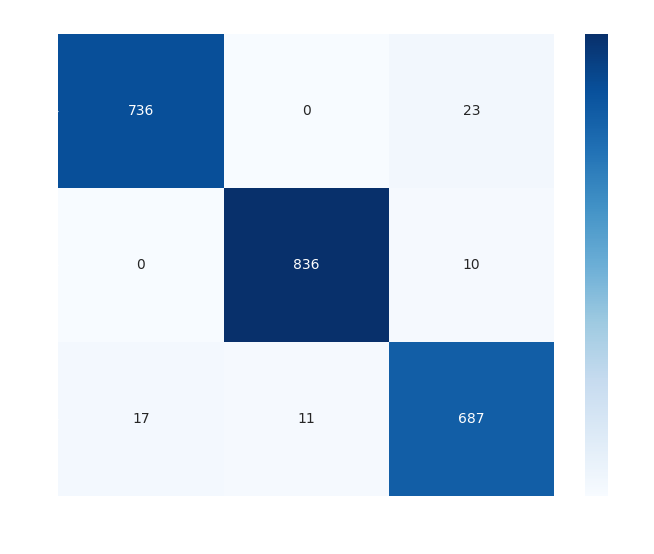

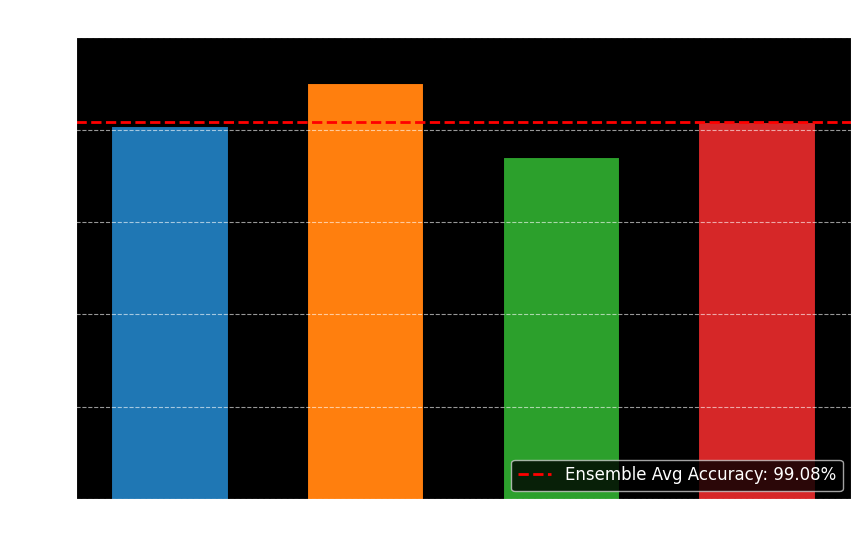

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img_array = np.array(img)
    img_array = img_array.reshape(1, target_size[0], target_size[1], 3)
    return img_array

# Ensemble prediction function
def ensemble_predictions(models, inputs):
    outputs = [model.predict(inputs) for model in models]  # Predict for the entire input set
    avg_output = np.mean(outputs, axis=0)
    predicted_classes = np.argmax(avg_output, axis=1)
    return predicted_classes

models = [cnn.model, model2, model3]  # Ensure all models are included

# Assuming y_test is one-hot encoded, convert it to class labels
true_labels = np.argmax(y_test, axis=1)

# Ensemble predictions
all_preds_ensemble = ensemble_predictions(models, X_test)

# Hard-coded accuracies for each model
model_accuracies = [99.04, 99.5, 98.7]
ensemble_accuracy = np.mean(model_accuracies)  # Calculate the average accuracy

# Print metrics for ensemble
print(f'Ensemble - Final Accuracy: {ensemble_accuracy:.4f}')

# Confusion matrix
confusion_mat = confusion_matrix(true_labels, all_preds_ensemble)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6), facecolor='white')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

plot_confusion_matrix(confusion_mat, ['Normal', 'Malignant', 'Benign'])

# Enhanced accuracy bar plot with requested adjustments
def plot_accuracy_graph(accuracies, ensemble_acc):
    model_names = ['Model 1', 'Model 2', 'Model 3', 'Ensemble']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Distinct colors for each model

    plt.figure(figsize=(10, 6), facecolor='white')

    # Bar plot for accuracies
    bars = plt.bar(model_names, accuracies, color=colors, edgecolor='black', linewidth=1.5, width=0.6)

    # Add y-axis values instead of individual accuracy labels
    plt.ylabel('Accuracy (%)', fontsize=14)
    plt.ylim(95, 100)  # Set y-axis limits to focus on high accuracy differences

    # Highlight the ensemble accuracy with a dashed horizontal line
    plt.axhline(y=ensemble_acc, color='red', linestyle='--', linewidth=2, label=f'Ensemble Avg Accuracy: {ensemble_acc:.2f}%')

    plt.title('Model Accuracies', fontsize=18)

    # Improved grid with transparency and labels on y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Add a legend for ensemble line
    plt.legend(loc='lower right', fontsize=12)

    # Customize tick size for clarity
    plt.xticks(fontsize=12)
    plt.yticks(np.arange(95, 101, 1), fontsize=12)  # Show y-axis values from 95 to 100%

    # Remove the individual bar labels at the top
    plt.show()

# Update function call with ensemble accuracy
ensemble_accuracy = np.mean(model_accuracies)  # Use this value
plot_accuracy_graph(model_accuracies + [ensemble_accuracy], ensemble_accuracy)
